In [7]:
import pandas as pd
data=pd.read_csv('data7.csv')#here is the data where we are going to do analyze for machine learning model perfection
data

,Height,Weight
0,3.0,12
1,4.4,20
2,5.5,27
3,6.3,45
4,6.2,43
5,5.6,39
6,6.7,60


In [2]:
data.describe()#it simply provide us stat data

,Height,Weight
count,7.000000,7.000000
mean,5.385714,35.142857
std,1.287670,16.446160
min,3.000000,12.000000
25%,4.950000,23.500000
50%,5.600000,39.000000
75%,6.250000,44.000000
max,6.700000,60.000000


In [4]:
data.Weight.mean()

35.142857142857146

In [6]:
data.Weight.std()

16.44616035663615

In [8]:
#Let's see how to handle outliers using logarithm 
x=pd.read_csv('data77.csv')
x

,Height,Weight
0,3.0,12
1,4.4,20
2,5.5,27
3,6.3,45
4,6.2,43
5,5.6,39
6,6.7,90


<AxesSubplot:ylabel='Frequency'>

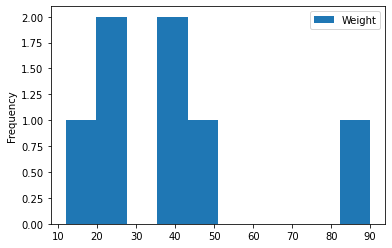

In [12]:
#90 is outliers which is very different from others 

x.plot(x='Height',y='Weight',kind='hist')#from hist the 90 data is very far way so we can called it outliers 



<AxesSubplot:xlabel='Height'>

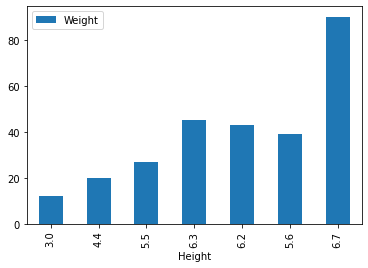

In [13]:
x.plot(x='Height',y='Weight',kind='bar')#this bar graph of data 

<AxesSubplot:xlabel='Height'>

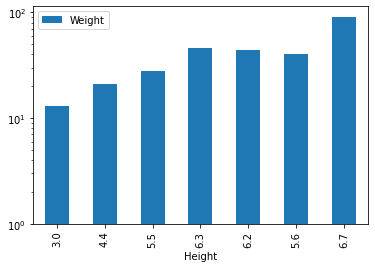

In [19]:
x.plot(x='Height',y='Weight',kind='bar',log=True)#we used logarithm to visulize data properly so we can anlayze properly 

In [58]:
#lets try with data 
import pandas as pd
import seaborn as sns
data=pd.read_csv('samp2.csv')
data.head()

,gender,height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,55.654540
4,Male,69.881796


<AxesSubplot:xlabel='height', ylabel='Count'>

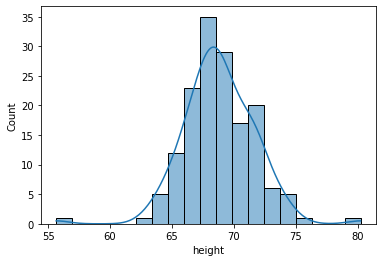

In [59]:
sns.histplot(data.height,kde=True)#kde shows bell curve 
#("Noramal or gausian distrubation")

In [60]:
mean=data.height.mean()
std=data.height.std()
mean-3*std#this is from gausian distrubation
#less than 60.41 is outliers

60.22731075906532

In [61]:
mean+3*std
#greater then 77.36 is also outliers 

77.3976679610629

In [64]:
data[(data.height<=60)|(data.height>=77.38)]#here we got two out liers which can affect our datas 

,gender,height
3,Male,55.65454
155,Male,80.23432


In [66]:
no_outliers=data[(data.height>=60)|(data.height<=77.38)]#without outliers data 
no_outliers,no_outliers.shape
#this method to clean outliers 

(    gender     height
 0     Male  73.847017
 1     Male  68.781904
 2     Male  74.110105
 3     Male  55.654540
 4     Male  69.881796
 ..     ...        ...
 151   Male  65.350411
 152   Male  70.844062
 153   Male  69.938475
 154   Male  64.739815
 155   Male  80.234320
 
 [156 rows x 2 columns],
 (156, 2))

In [69]:
#Now dealing with Z score
data['ZScore']=(data.height-data.height.mean())/data.height.std()#z score formula 
data.head()

,gender,height,ZScore
0,Male,73.847017,1.759263
1,Male,68.781904,-0.010688
2,Male,74.110105,1.851196
3,Male,55.654540,-4.597906
4,Male,69.881796,0.373658


In [73]:
data[(data.ZScore<-3)|(data.ZScore>3)]#again we got outliers same as gausaian distrubution method 

,gender,height,ZScore
3,Male,55.65454,-4.597906
155,Male,80.23432,3.991238


In [75]:
data[(data.ZScore>-3)|(data.ZScore<3)].head(9)#outliers cleaned 

,gender,height,ZScore
0,Male,73.847017,1.759263
1,Male,68.781904,-0.010688
2,Male,74.110105,1.851196
3,Male,55.654540,-4.597906
4,Male,69.881796,0.373658
5,Male,67.253016,-0.544942
6,Male,68.785081,-0.009577
7,Male,68.348516,-0.162131
8,Male,67.018950,-0.626734


In [78]:
#Another is median , mode , percentile or quantile 
data=pd.read_csv('m.csv')
data

,Name,Mincome
0,Rob,5000
1,Rafiq,6000
2,Nina,4000
3,Sofia,7500
4,Mohan,8000
5,Tao,7000
6,Elon Musk,10000000


In [79]:
#there is outliers which is elon musk 
data.Mincome.mean()#this should not be average salary of people so we use medaina

1433928.5714285714

In [80]:
#if even we can find easily if odd use medain
data.Mincome.median() 

7000.0

In [82]:
#Mode is number of vote who win thats have more values simple concept 
data.describe()

,Mincome
count,6.000000e+00
mean,1.672250e+06
std,4.079748e+06
min,5.000000e+03
25%,6.250000e+03
50%,7.250000e+03
75%,7.875000e+03
max,1.000000e+07


In [83]:
data.Mincome.quantile(0.5)#ther in tuple it remeber as percent 
#from 7250 it's 50 percentile 

7250.0

In [85]:
x=data.Mincome.quantile(0.99)#to remove the outliers

In [86]:
data[data.Mincome<x]#we sucessfully remove the outliers

,Name,Mincome
0,Rob,5000.0
1,Rafiq,6000.0
3,Sofia,7500.0
4,Mohan,8000.0
5,Tao,7000.0


In [81]:
data=pd.read_csv('m1.csv')
data

,Name,Mincome
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,NaN
3,Sofia,7500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [87]:
#some time we got nan value so we used median or cleaning the data
#now input the nana value
df_new=data.fillna(data.Mincome.median())
df_new
#method to clean the data 

,Name,Mincome
0,Rob,5000.0
1,Rafiq,6000.0
2,Nina,7250.0
3,Sofia,7500.0
4,Mohan,8000.0
5,Tao,7000.0
6,Elon Musk,10000000.0


In [1]:
#It's times for eda 
#Explotary data analysis with seaborn 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
iris=pd.read_csv('iris.csv')
iris.head(56)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,5.4,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [7]:
iris.shape

(150, 5)

In [8]:
iris.columns

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [10]:
#lets count how many types of folwer are present in species or variety 
iris['variety'].value_counts()
#balanced dataset vs unbalanced dataset 
#they all are balanced dataset

Setosa        50
Versicolor    50
Virginica     50
Name: variety, dtype: int64

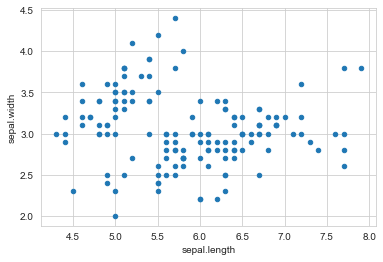

In [17]:
iris.plot(x='sepal.length',y='sepal.width',kind='scatter')
plt.show()

c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


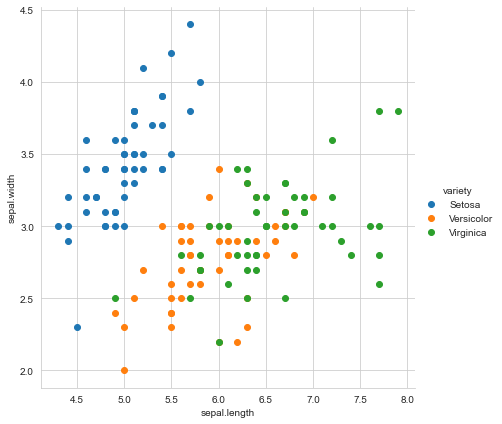

In [23]:
#Now working with seaborn libray 
sn.set_style('whitegrid')#it will make white grid lines 
# this sign \ is new line to code 
#facetgrid(dataset,hue='output name',size='circle size')
sn.FacetGrid(iris,hue='variety',size=6) \
    .map(plt.scatter,'sepal.length','sepal.width') \
    .add_legend()#it shows us label of flower 
plt.show()
#mapping species width and legth with species which will show in category form 

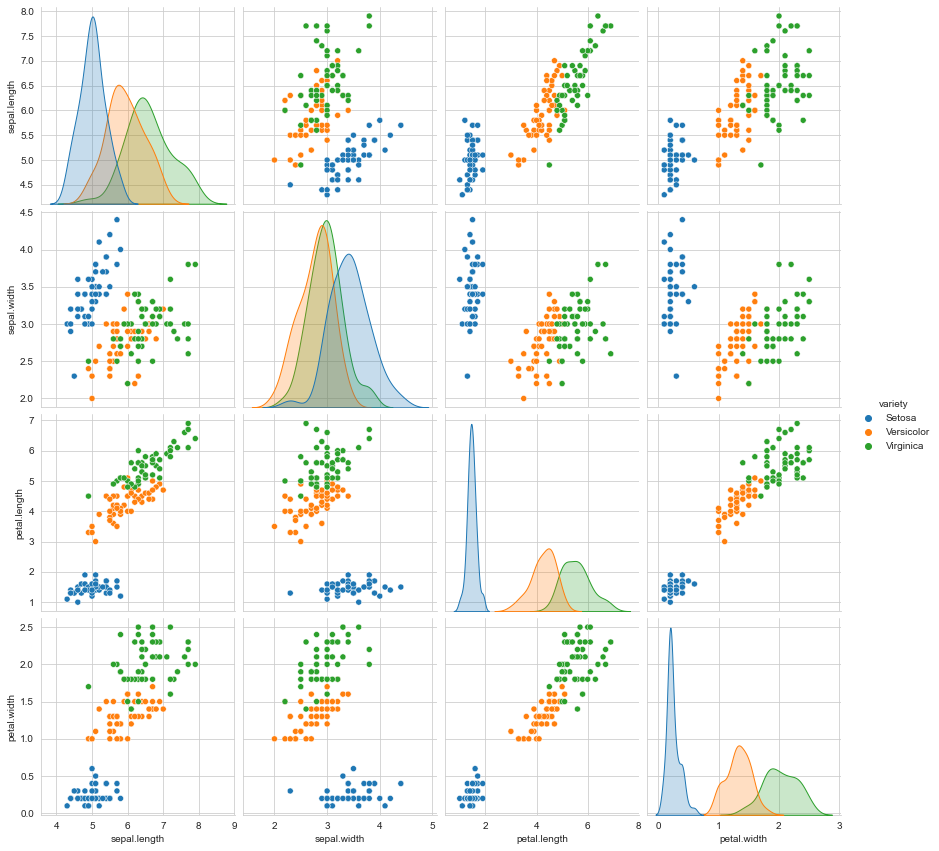

In [38]:
#Now we are going to learn pairplot 
#if we have more than two features or more than two dimension the we used pairplot to convert in 2d 
sn.set_style('whitegrid')
sn.pairplot(iris,hue='variety',height=3)


In [32]:
help(sn.set_style)

Help on function set_style in module seaborn.rcmod:

set_style(style=None, rc=None)
    Set the aesthetic style of the plots.
    
    This affects things like the color of the axes, whether a grid is
    enabled by default, and other aesthetic elements.
    
    Parameters
    ----------
    style : dict, None, or one of {darkgrid, whitegrid, dark, white, ticks}
        A dictionary of parameters or the name of a preconfigured set.
    rc : dict, optional
        Parameter mappings to override the values in the preset seaborn
        style dictionaries. This only updates parameters that are
        considered part of the style definition.
    
    Examples
    --------
    >>> set_style("whitegrid")
    
    >>> set_style("ticks", {"xtick.major.size": 8, "ytick.major.size": 8})
    
    See Also
    --------
    axes_style : return a dict of parameters or use in a ``with`` statement
                 to temporarily set the style.
    set_context : set parameters to scale plot elements


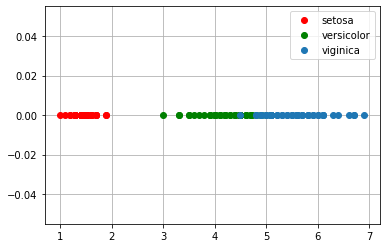

In [6]:
#Histogram eda 
#converting the data into 1d plane to see data properly 
iris_setosa=iris.loc[iris['variety']=='Setosa']
iris_virginica=iris.loc[iris['variety']=='Virginica']
iris_versicolor=iris.loc[iris['variety']=='Versicolor']
#storing rows in one variable
#np.zeros_like() it will make zeros to convert 1d for balacing same dimension value also 
plt.plot(iris_setosa['petal.length'],np.zeros_like(iris_setosa['petal.length']),'o',color='r',label='setosa')
plt.plot(iris_versicolor['petal.length'],np.zeros_like(iris_virginica['petal.length']),'o',color='g',label='versicolor')
plt.plot(iris_virginica['petal.length'],np.zeros_like(iris_versicolor['petal.length']),'o',label='viginica')
plt.grid()

plt.legend()

In [ ]:
#if greater than 2 and less than 4.7 then it is called versicolor 
# if greater than 1 and less than 2 called setosa 
#limitation is problem is becuase of deepness we can't find peoperly but still good to analyze so we used histogram 

c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lot

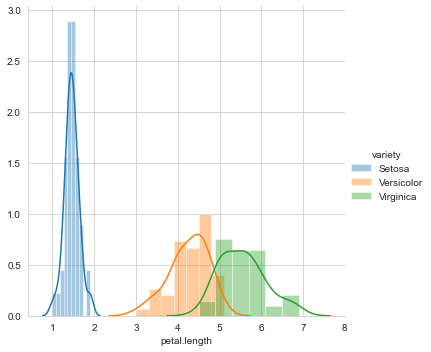

In [25]:
#Histogram 
sn.FacetGrid(iris,hue='variety',size=5) \
    .map(sn.distplot,'petal.length') \
    .add_legend()
plt.show()
#distanceplot

In [ ]:
#curve line we called probability density function
#if greater than 1 and less than 2 then it called ssetosa 
# problem is when two line cut that we called probality boundry line 
#if greater than 2 less than 5 then versicolor
# if freater than 5 less than 7.6


c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lot

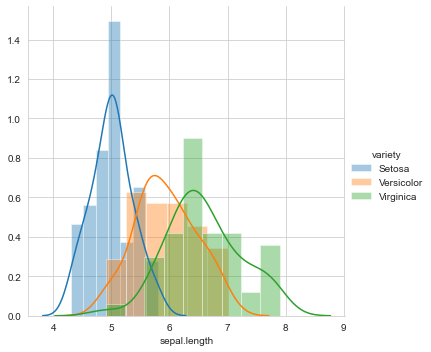

In [26]:
sn.FacetGrid(iris,hue='variety',size=5) \
    .map(sn.distplot,'sepal.length') \
    .add_legend()
plt.show()

In [ ]:
#for sepal length it is not possible to to do if else condition it is complex 

c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lot

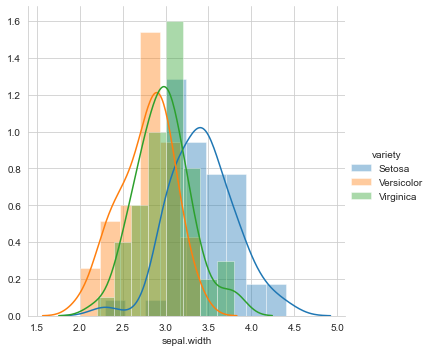

In [27]:
sn.FacetGrid(iris,hue='variety',size=5) \
    .map(sn.distplot,'sepal.width') \
    .add_legend()
plt.show()

In [ ]:
#it's more complex not possible to predict 
#final research is petal.legth is more important column for ml model 
#it's called PDF probality distrubation function

[0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


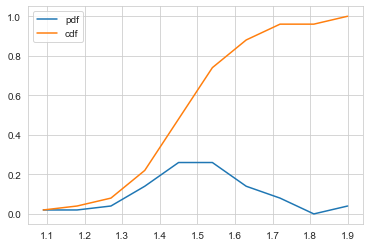

In [37]:
#Now it's times for CDF cumulative distrubation function
counts,bin_edges=np.histogram(iris_setosa['petal.length'],bins=10,density=True)#here is setosa value in counts of histograms
#bins is taking difference up to what to what point petal.length are so they are difference so we can take any values like linspace 
print(counts)
pdf=counts/(sum(counts))#storing all pdf value in counts 
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.legend()
plt.show()


In [ ]:
#if setosa petal.length==1.6 the probality is 0.82 which means 82% probality if 1.9 then 100%

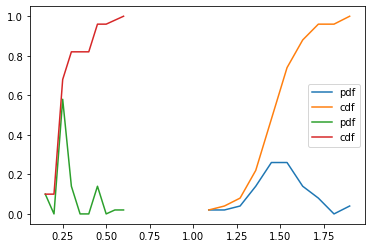

In [11]:
counts,bin_edges=np.histogram(iris_setosa['petal.length'],bins=10,density=True)
counts2,bin_edges2=np.histogram(iris_setosa['petal.width'],bins=10,density=True)
pdf=counts/(sum(counts))#storing all pdf value in counts 
pdf2=counts2/(sum(counts2))
cdf=np.cumsum(pdf)
cdf2=np.cumsum(pdf2)
plt.plot(bin_edges[1:],pdf,label='pdf')
plt.plot(bin_edges[1:],cdf,label='cdf')
plt.plot(bin_edges2[1:],pdf2,label='pdf')
plt.plot(bin_edges2[1:],cdf2,label='cdf')
plt.legend()
plt.show()

<AxesSubplot:xlabel='variety', ylabel='petal.length'>

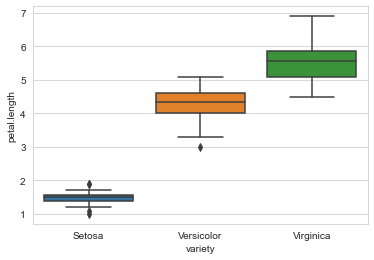

In [13]:
#Now it's times for box plot
sn.set_style('whitegrid')
sn.boxplot(x='variety',y='petal.length',data=iris)


In [ ]:
#Lines called percentile 
#upper called pper whisker lower called lower whisker 
#chances of viginica is 25% in 5 90% in versicolor 100% setosa between 1 and 2


<AxesSubplot:xlabel='variety', ylabel='petal.length'>

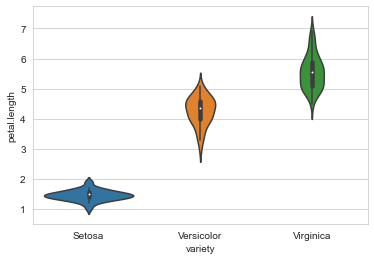

In [15]:

sn.violinplot(x='variety',y='petal.length',data=iris,height=3)

array([[<AxesSubplot:title={'center':'sepal.length'}>,
        <AxesSubplot:title={'center':'sepal.width'}>],
       [<AxesSubplot:title={'center':'petal.length'}>,
        <AxesSubplot:title={'center':'petal.width'}>]], dtype=object)

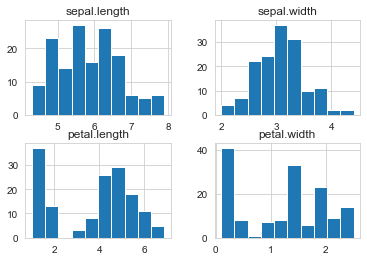

In [21]:
iris.hist()

# Cancer  Data Analysis

In [1]:
#it's times for doing the exercise 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv('haberman.csv')
data.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [26]:
#data.columns=['',''] this way we can name column 

Index(['age', 'operation_year', 'axillary_lymph_node', 'survival_status'], dtype='object')

In [2]:
#1 means the patient survied up to 5 years 2 means less than 5 years 
data.shape
data.info()#checking is ther any nan value is there or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  305 non-null    int64
 1   operation_year       305 non-null    int64
 2   axillary_lymph_node  305 non-null    int64
 3   survival_status      305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [3]:
data['survival_status']=data['survival_status'].map({1:'Yes',2:'No'})#map function used to change sequence of data in any form or replace 
data.head()

,age,operation_year,axillary_lymph_node,survival_status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [4]:
data.describe()

,age,operation_year,axillary_lymph_node
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In [5]:
data['survival_status'].value_counts()

Yes    224
No      81
Name: survival_status, dtype: int64

In [9]:
status_yes=data[data['survival_status']=='Yes']
status_yes.describe()

,age,operation_year,axillary_lymph_node
count,224.000000,224.000000,224.000000
mean,52.116071,62.857143,2.799107
std,10.937446,3.229231,5.882237
min,30.000000,58.000000,0.000000
25%,43.000000,60.000000,0.000000
50%,52.000000,63.000000,0.000000
75%,60.000000,66.000000,3.000000
max,77.000000,69.000000,46.000000


In [10]:
status_no=data[data['survival_status']=='No']
status_no.describe()

,age,operation_year,axillary_lymph_node
count,81.000000,81.000000,81.000000
mean,53.679012,62.827160,7.456790
std,10.167137,3.342118,9.185654
min,34.000000,58.000000,0.000000
25%,46.000000,59.000000,1.000000
50%,53.000000,63.000000,4.000000
75%,61.000000,65.000000,11.000000
max,83.000000,69.000000,52.000000


c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


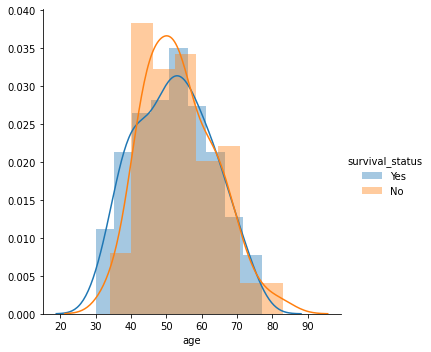

In [14]:
import seaborn as sn
sn.FacetGrid(data,hue='survival_status',size=5) \
    .map(sn.distplot,'age') \
    .add_legend()
plt.show()

In [ ]:
#it is not much clear but we know that the people having age 30 to 35 person have chances to live is more
#no is more clearly seen in curve line 

c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


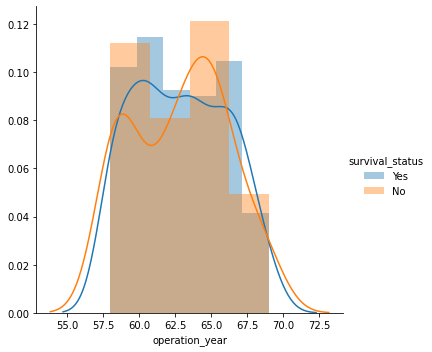

In [15]:
sn.FacetGrid(data,hue='survival_status',size=5) \
    .map(sn.distplot,'operation_year') \
    .add_legend()
plt.show()

<AxesSubplot:>

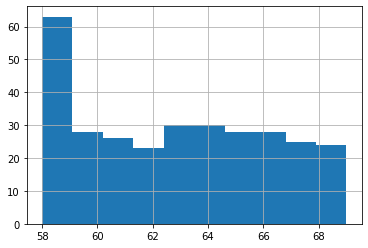

In [17]:
#it also not showing clear information 
#but we can know in which years operation was done more 
data['operation_year'].hist()

c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\lotus\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


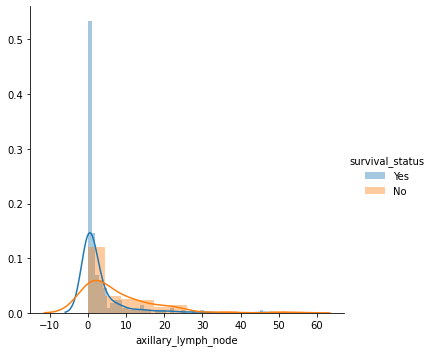

In [20]:
sn.FacetGrid(data,hue='survival_status',size=5) \
    .map(sn.distplot,'axillary_lymph_node') \
    .add_legend()
plt.show()

[0.18148292 0.01746894 0.00485248 0.00582298 0.00388199 0.0009705
 0.00194099 0.         0.         0.0009705 ]
[0.83482143 0.08035714 0.02232143 0.02678571 0.01785714 0.00446429
 0.00892857 0.         0.         0.00446429]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


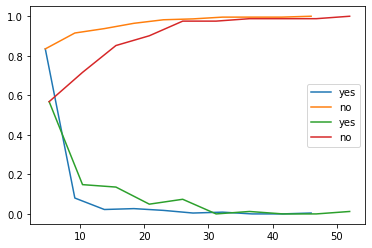

In [26]:
#Now it's times for CDF cumulative distrubation function
counts,bin_edges=np.histogram(status_yes['axillary_lymph_node'],bins=10,density=True)
#bins is taking difference up to what to what point petal.length are so they are difference so we can take any values like linspace 
print(counts)
pdf=counts/(sum(counts))#storing all pdf value in counts 
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)

plt.plot(bin_edges[1:],pdf,label='yes')
plt.plot(bin_edges[1:],cdf,label='no')


counts2,bin_edges2=np.histogram(status_no['axillary_lymph_node'],bins=10,density=True)#here is setosa value in counts of histograms
#bins is taking difference up to what to what point petal.length are so they are difference so we can take any values like linspace 

pdf2=counts2/(sum(counts2))#storing all pdf value in counts 

#CDF
cdf2=np.cumsum(pdf2)

plt.plot(bin_edges2[1:],pdf2,label='yes')
plt.plot(bin_edges2[1:],cdf2,label='no')
plt.legend()
plt.show()

<AxesSubplot:xlabel='survival_status', ylabel='age'>

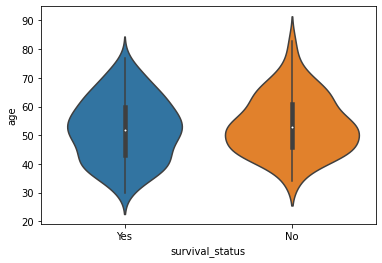

In [29]:
sn.violinplot(x='survival_status',y='age',data=data,height=3)


<AxesSubplot:xlabel='survival_status', ylabel='operation_year'>

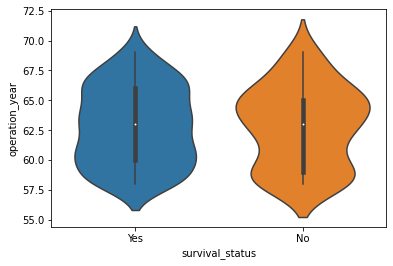

In [30]:
sn.violinplot(x='survival_status',y='operation_year',data=data,height=3)


<AxesSubplot:xlabel='survival_status', ylabel='axillary_lymph_node'>

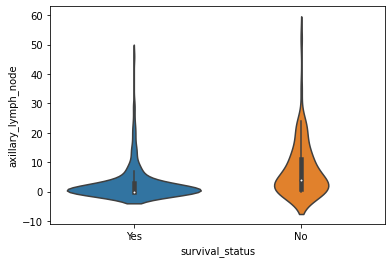

In [31]:
sn.violinplot(x='survival_status',y='axillary_lymph_node',data=data,height=3)

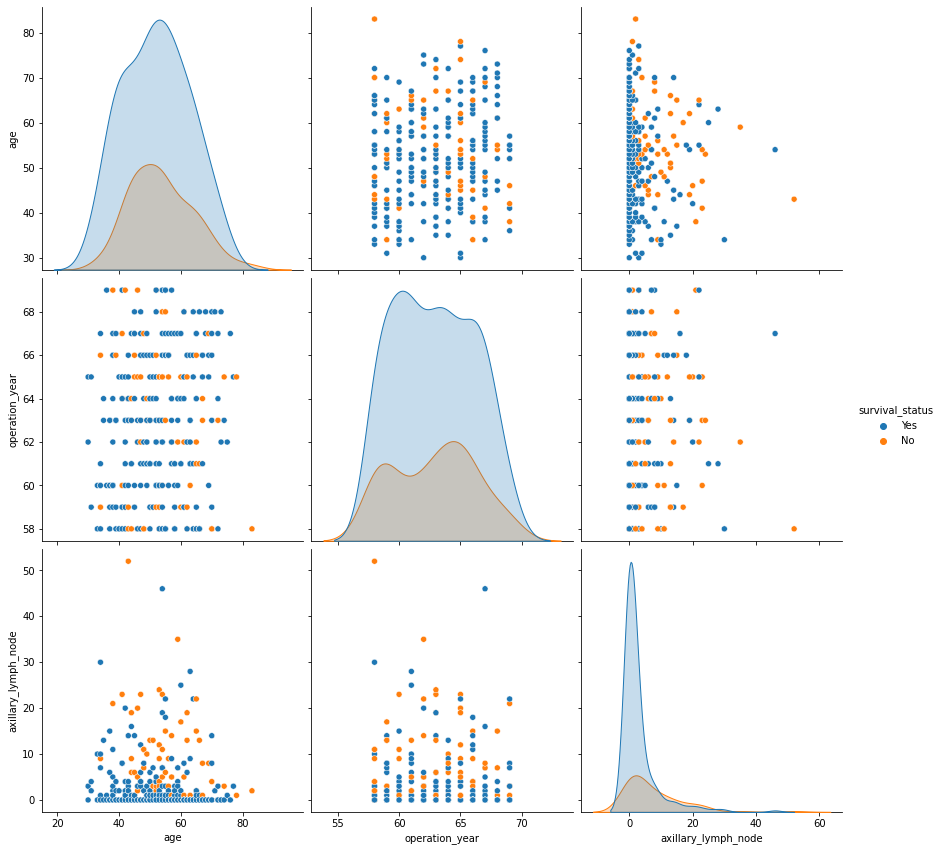

In [33]:
sn.pairplot(data,hue='survival_status',height=4)

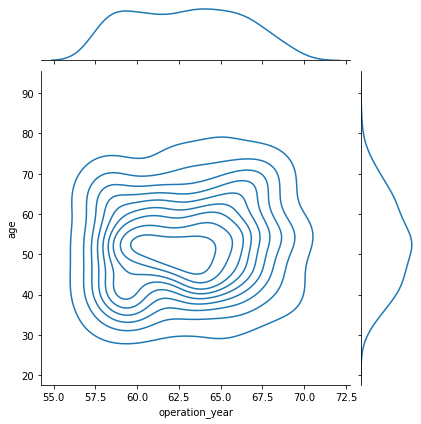

In [40]:
sn.jointplot(x='operation_year',y='age',data=data,kind='kde')
plt.show()